In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from itertools import combinations

from functions.download_data import download_sp500, download_one_stock
from functions.gen_samples import gen_ou, gen_gbm
from functions.compute_distance import signature_distance, ssd_distance
from functions.mle_ou import mle_ou

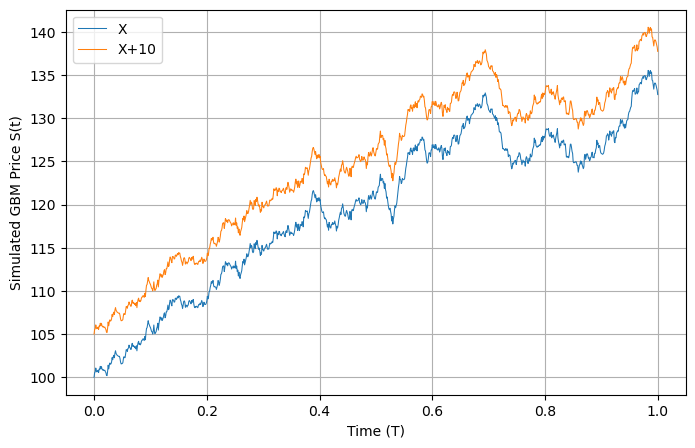

158.19292019556374
9.322391955137446e-10


In [176]:
#------------Section 6.1 signature distance-------------#
T=1.0
n=1001
num_paths = 1
x0=100
mu=0.2
sigma=0.1
t = np.linspace(0, T, n)

# Generate gbm and its transformations
gbm_series = np.array(gen_gbm(num_paths, x0, mu, sigma, T, n)[0])
gbm_series1 = gbm_series + 5

# plot the prices of stock pairs
plt.figure(figsize=(8, 5))
plt.plot(t, gbm_series, lw=0.75, label='X')
plt.plot(t, gbm_series1, lw=0.75, label='X+10')
plt.legend()
plt.xlabel("Time (T)")
plt.ylabel("Simulated GBM Price S(t)")
plt.grid(True)
plt.show()

# compute signature distance for each pairs in group
distance = euclidean_distance(gbm_series, gbm_series1)
print(distance)

# compute signature distance for each pairs in group
distance = signature_distance(gbm_series, gbm_series1, sig_level=3)
print(distance)

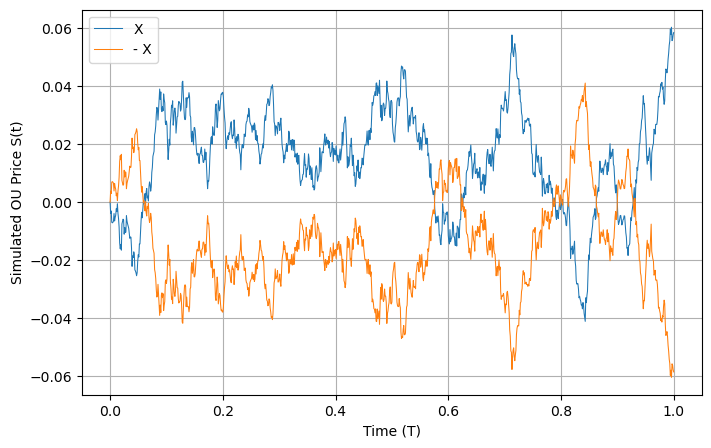

1.481790279478588
217.86698526489798


In [175]:
# OU example
T=1.0
n=1001
num_paths = 1
x0=0
mu=0.2
sigma=0.1
theta=0
t = np.linspace(0, T, n)

# Generate gbm and its transformations
ou_series = np.array(gen_ou(num_paths, x0, mu, theta, sigma, T, n)[0])
ou_series1 = - ou_series

# plot the prices of stock pairs
plt.figure(figsize=(8, 5))
plt.plot(t, ou_series, lw=0.75, label='X')
plt.plot(t, ou_series1, lw=0.75, label='- X')
plt.legend()
plt.xlabel("Time (T)")
plt.ylabel("Simulated OU Price S(t)")
plt.grid(True)
plt.show()

# compute signature distance for each pairs in group
distance = euclidean_distance(ou_series, ou_series1)
print(distance)

# compute signature distance for each pairs in group
distance = signature_distance(ou_series, ou_series1, sig_level=3)
print(np.sqrt(distance))

1.0


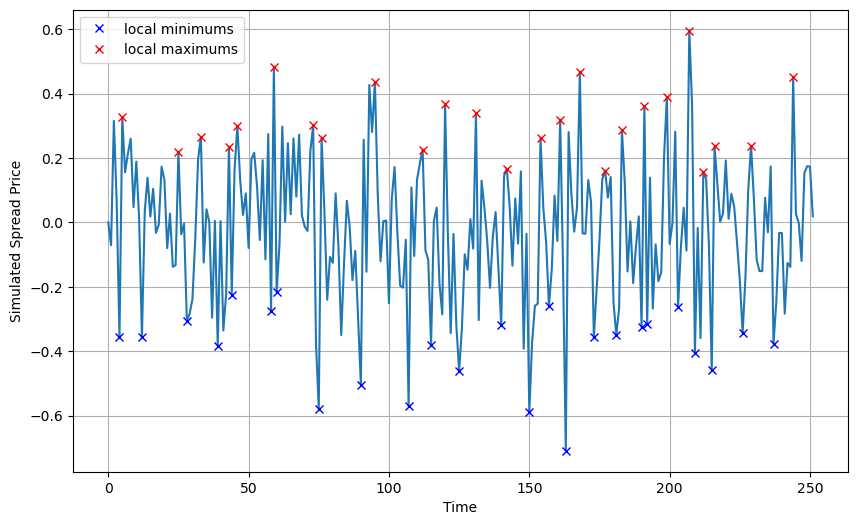

In [6]:
#------------------------ 6.2 Mean Reversion Time -------------------------#
from functions.mean_reversion_time import get_mean_reverse_time, find_maximum, find_minimum

# Test find extreme value algorithm
C = 2
t = np.arange(0, 252)
# gen_ou(m, x0, mu, theta, sigma, T, n)
x = np.array(gen_ou(m=1, x0=0, mu=10, theta=0, sigma=1, T=252, n=252)[0])

plt.figure(figsize=(10, 6))
plt.plot(t, x)
print(get_mean_reverse_time(x, C))
index_min = find_minimum(x, C)
plt.plot(t[index_min], x[index_min], 'bx', label='local minimums')
index_max = find_maximum(x, C)
plt.plot(t[index_max], x[index_max], 'rx', label='local maximums')
plt.legend(loc="upper left")
plt.xlabel("Time")
plt.ylabel("Simulated Spread Price")
plt.grid(True)
plt.show()

In [26]:
# Test EMRT
T = 1.0
n = 1001
m = 100
x0 = 0
theta=0
sigma=1
t = np.linspace(0, T, n)
C = 2

for mu in np.linspace(2, 20, 10):
    # generate ou paths
    x_list = np.array(gen_ou(m, x0, mu, theta, sigma, T, n))

    # compute the average of MRT
    mrt = 0
    for x in x_list:
        mrt += get_mean_reverse_time(x, C)
    mrt = mrt / m
    print('mu =', mu,'mrt =', mrt)

mu = 2.0 mrt = 98.79115043290044
mu = 4.0 mrt = 83.45503998779
mu = 6.0 mrt = 78.09646024531024
mu = 8.0 mrt = 59.22981981580513
mu = 10.0 mrt = 59.512992868242875
mu = 12.0 mrt = 49.225010657428236
mu = 14.0 mrt = 45.10477832951362
mu = 16.0 mrt = 38.040858718079306
mu = 18.0 mrt = 35.63321673261379
mu = 20.0 mrt = 31.153047353659257


In [2]:
#------------------------ Section 6.3 Q-learning on simulated OU process -------------------------#
# Function to update state based on prices
from functions.reinforcement_learning import RL_agent_training, RL_agent_take_actions
from functions.trading_performance import compute_profit, plot_actions

In [13]:
# Generating training OU samples
num_samples = 10000
x0 = 1
mu = 1
theta = 1
sigma = 0.1
T = 252
n = 253
training_series = gen_ou(num_samples, x0, mu, theta, sigma, T, n)

# Q-learning parameters
l = 3
num_states = 4 ** l  # 16 states for the last 3 time points
num_actions = 3  # Actions: -1, 0, 1
learning_rate = 0.1
discount_factor = 0.99
epsilon = 0.1
num_episodes = 10

In [24]:
# Initialize the Q-table
Q_table = np.zeros((num_states, num_actions)) 
# Load q table: 
# Q_table = np.loadtxt('q_table.txt', dtype=float)  

# Training
Q_table = RL_agent_training(training_series, Q_table, l, theta, learning_rate, discount_factor, epsilon, num_episodes)
              
# Save q_table            
np.savetxt('q_table.txt', Q_table, fmt='%f')
Q_table

array([[2.16170115, 2.27097997, 2.34435884],
       [2.19933736, 2.27708091, 2.32504336],
       [2.22446636, 2.27461447, 2.32754903],
       [2.2537552 , 2.27835099, 2.25997991],
       [2.17689963, 2.26545798, 2.33532585],
       [2.23032165, 2.27489261, 2.26375948],
       [2.27122931, 2.28534269, 2.27187475],
       [2.2652423 , 2.26595702, 2.23589504],
       [2.17504974, 2.26642588, 2.32520664],
       [2.25612131, 2.27496186, 2.28003733],
       [2.24606582, 2.26350671, 2.2490111 ],
       [2.31177097, 2.28742319, 2.22305787],
       [2.21379313, 2.26014852, 2.27865534],
       [2.25230822, 2.28768104, 2.25755109],
       [2.26621138, 2.27707602, 2.24748553],
       [2.34453369, 2.26805569, 2.18729186],
       [2.17159819, 2.27719538, 2.34505783],
       [2.22415071, 2.26881907, 2.34168922],
       [2.22799625, 2.2761434 , 2.31261227],
       [2.25743647, 2.27259342, 2.25566127],
       [2.20808077, 2.27700235, 2.32869562],
       [2.2236923 , 2.28469405, 2.26110249],
       [2.

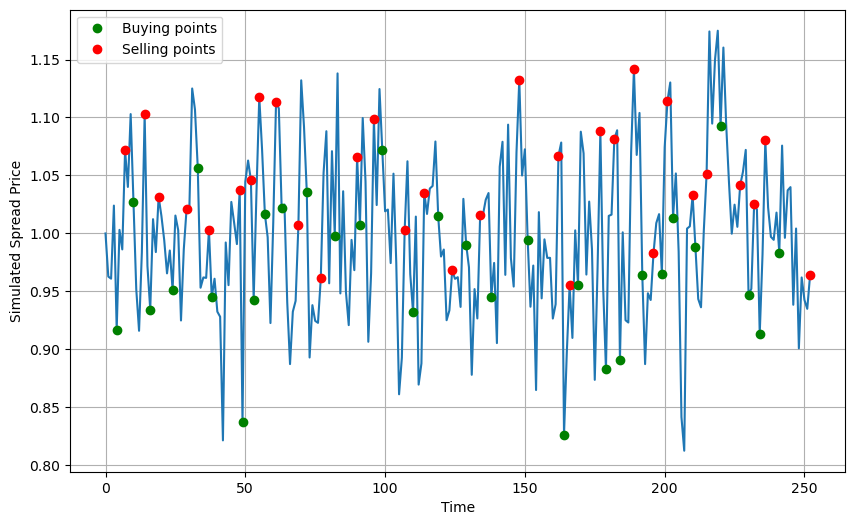

In [14]:
########## Test one new sample ################
Q_table = np.loadtxt('q_table.txt', dtype=float)  

# New Time Series for Testing
test_series = gen_ou(1, x0, mu, theta, sigma, T, n)[0]

# Take actions based on the trained agent
test_actions = RL_agent_take_actions(test_series, Q_table, l)

# Plot actions with series
plot_actions(test_series, test_actions)


In [15]:
########## Test several new sample and calculate cumulative returns ################
# New Time Series for Testing
test_series_list = gen_ou(100, x0, mu, theta, 0.1, T, n)

profit_list = []
for test_series in test_series_list:
    test_actions = RL_agent_take_actions(test_series, Q_table, l)
    _, profit = compute_profit(test_series, test_series, 0, test_actions)
    profit_list.append(profit)
ave_profit = np.average(profit_list)
ave_profit

10.110658430411643

In [3]:
#------------------ Section 6.4 SP500 Experiments ------------------#
# sp500 = download_sp500(date(2013, 1, 1), date(2023, 12, 31))
# sp500 = sp500['Adj Close'].dropna(axis=1) 
# sp500.to_pickle('prices2013-2023')
sp500 = pd.read_pickle('prices2013-2023')
sp500.head()

,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,27.237341,13.179526,16.747723,22.207659,25.875971,14.793333,56.418934,38.340000,34.286083,21.220469,...,18.952639,95.304092,19.223898,55.648552,37.067036,23.749271,39.127857,60.087971,40.959999,17.403910
2013-01-03,27.334888,12.877846,16.536327,22.024277,26.860958,14.750000,56.214714,37.750000,33.732845,21.050234,...,18.952639,96.329216,19.167732,55.548199,36.966404,23.671541,39.372536,60.948917,41.000000,17.427654
2013-01-04,27.874701,13.886582,16.075718,21.746048,26.699480,14.876667,56.525173,38.130001,33.132828,21.627556,...,19.108681,97.491562,19.237944,55.805382,37.286560,23.637005,39.803658,61.259537,40.669998,17.926266
2013-01-07,27.673086,13.990285,15.981148,21.790304,26.917465,14.730000,56.280064,37.939999,33.234142,20.731953,...,19.167192,97.822487,19.034327,55.159283,37.414646,23.326099,39.553165,61.410416,40.900002,17.839212
2013-01-08,27.451960,14.291961,16.024157,21.316059,26.925539,14.750000,56.606861,38.139999,32.891270,20.976210,...,19.297232,97.741791,19.069433,55.504295,36.984703,23.041111,37.892727,61.499191,40.930000,17.483055


In [7]:
############################## Pairs Selection ############################
# formation and trading year
formation_year = 2022
trading_year =  formation_year + 1
formation_year, trading_year = str(formation_year), str(trading_year)

# all candidates
sectors = {
    "Technology": ["AAPL", "MSFT", "GOOGL", "META", "INTC", "CSCO", "NVDA", "ADBE", "ORCL", "IBM"],
    "Healthcare": ["JNJ", "PFE", "MRK", "ABT", "AMGN", "UNH", "MDT", "GILD", "BMY", "CVS"],
    "Consumer Goods": ["PG", "KO", "PEP", "NKE", "MO", "PM", "EL", "CL", "KMB", "GIS"],
    "Financials": ["JPM", "BAC", "WFC", "C", "GS", "MS", "AXP", "V", "MA", "CB"],
    "Industrials": ["MMM", "GE", "HON", "UNP", "CAT", "LMT", "BA", "DE", "UPS", "RTX"],
    "Energy": ["XOM", "CVX", "COP", "SLB", "PSX", "EOG", "OXY", "VLO", "MPC", "BKR"],
    "Real Estate": ["AMT", "PLD", "CCI", "SPG", "EQIX", "DLR", "WELL", "O", "VTR", "AVB"],
    "Materials": ["LIN", "ECL", "SHW", "APD", "PPG", "NEM", "FCX", "LYB", "VMC"],
    "Telecommunication Services": ["T", "VZ", "TMUS", "CHTR", "SBAC", "CCI"],
    "Transportation": ["UPS", "FDX", "NSC", "UNP", "DAL", "LUV", "AAL", "UAL", "CSX", "ETN"],
}


sector_pairs = {
    "Technology": [],
    "Healthcare": [],
    "Consumer Goods": [],
    "Financials": [],
    "Industrials": [],
    "Energy": [],
    "Real Estate": [],
    "Materials": [],
    "Telecommunication Services": [],
    "Transportation":[],
}

In [8]:
# compute distances
for key in sectors:
    # Normalization
    names = sectors[key]
    sp500_sector = sp500[names][formation_year].copy()
    normalized_sp500_sector = sp500_sector.apply(lambda x: x / x.iloc[0]) 

    # Calculate Euclidean distance for each pair of columns
    column_pairs = combinations(normalized_sp500_sector.columns, 2)
    ssd_distances = {}
    for col1, col2 in column_pairs:
        distance = ssd_distance(normalized_sp500_sector[col1], normalized_sp500_sector[col2])
        ssd_distances[(col1, col2)] = distance  

    # Sort the distances dictionary by distance, in ascending order
    sorted_distances = sorted(ssd_distances.items(), key=lambda x: x[1])    

    # Select the top ten pairs with the minimum distance
    top_three_pairs = sorted_distances[:3]   

    # Print the top ten pairs with their distances
    for pair, distance in top_three_pairs:
        print(f"Pair: {pair}, Distance: {distance}")   
        sector_pairs[key].append(pair)

Pair: ('MSFT', 'GOOGL'), Distance: 0.5830059882972387
Pair: ('MSFT', 'CSCO'), Distance: 0.8138593454039581
Pair: ('AAPL', 'MSFT'), Distance: 0.9251901565585021
Pair: ('JNJ', 'UNH'), Distance: 0.6928902869742735
Pair: ('JNJ', 'CVS'), Distance: 1.6054548272526514
Pair: ('UNH', 'CVS'), Distance: 2.038868317341147
Pair: ('CL', 'KMB'), Distance: 0.2449664125449388
Pair: ('KO', 'PM'), Distance: 0.47447228296970934
Pair: ('NKE', 'EL'), Distance: 0.4764893654976377
Pair: ('V', 'MA'), Distance: 0.17262846523777758
Pair: ('BAC', 'C'), Distance: 0.608482689328642
Pair: ('JPM', 'BAC'), Distance: 0.6297358550115711
Pair: ('UNP', 'UPS'), Distance: 0.5115719447007183
Pair: ('GE', 'BA'), Distance: 1.2860577705159641
Pair: ('HON', 'CAT'), Distance: 1.6012177785448873
Pair: ('XOM', 'MPC'), Distance: 0.9714935888210694
Pair: ('CVX', 'EOG'), Distance: 1.0660205772050524
Pair: ('XOM', 'COP'), Distance: 1.8187143927016804
Pair: ('WELL', 'VTR'), Distance: 0.6211210064249082
Pair: ('PLD', 'AVB'), Distance: 0.

C:\Users\Boming\AppData\Local\Temp\ipykernel_3444\1497251009.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  sp500_sector = sp500[names][formation_year].copy()
C:\Users\Boming\AppData\Local\Temp\ipykernel_3444\1497251009.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  sp500_sector = sp500[names][formation_year].copy()
C:\Users\Boming\AppData\Local\Temp\ipykernel_3444\1497251009.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  sp500_sector = sp500[names][formation_year].copy()
C

In [9]:
sector_pairs

{'Technology': [('MSFT', 'GOOGL'), ('MSFT', 'CSCO'), ('AAPL', 'MSFT')],
 'Healthcare': [('JNJ', 'UNH'), ('JNJ', 'CVS'), ('UNH', 'CVS')],
 'Consumer Goods': [('CL', 'KMB'), ('KO', 'PM'), ('NKE', 'EL')],
 'Financials': [('V', 'MA'), ('BAC', 'C'), ('JPM', 'BAC')],
 'Industrials': [('UNP', 'UPS'), ('GE', 'BA'), ('HON', 'CAT')],
 'Energy': [('XOM', 'MPC'), ('CVX', 'EOG'), ('XOM', 'COP')],
 'Real Estate': [('WELL', 'VTR'), ('PLD', 'AVB'), ('AMT', 'CCI')],
 'Materials': [('SHW', 'PPG'), ('ECL', 'SHW'), ('ECL', 'PPG')],
 'Telecommunication Services': [('SBAC', 'CCI'),
  ('VZ', 'SBAC'),
  ('VZ', 'CCI')],
 'Transportation': [('NSC', 'CSX'), ('UPS', 'UNP'), ('DAL', 'UAL')]}

In [10]:
############################## Calculate B ############################
from functions.get_best_ratio import ou_get_best_ratio, mrt_get_best_ratio

stock_names = {'MSFT-GOOGL':[], 'CVS-JNJ':[], 'CL-KMB':[], 'V-MA':[],  'GE-BA':[], 'OXY-XOM':[], 'WELL-VTR':[], 'PPG-SHW':[], 'VZ-TMUS':[], 'CSX-NSC':[]}

In [11]:
# dm ratios
dm_best_ratios = stock_names.copy()
for key in dm_best_ratios:
    dm_best_ratios[key] = 1.0
dm_best_ratios

{'MSFT-GOOGL': 1.0,
 'CVS-JNJ': 1.0,
 'CL-KMB': 1.0,
 'V-MA': 1.0,
 'GE-BA': 1.0,
 'OXY-XOM': 1.0,
 'WELL-VTR': 1.0,
 'PPG-SHW': 1.0,
 'VZ-TMUS': 1.0,
 'CSX-NSC': 1.0}

In [12]:
# ou ratios
ou_best_ratios = stock_names.copy()
for key in ou_best_ratios:
    name1 = key.split('-')[0]
    name2 = key.split('-')[1]
    b = ou_get_best_ratio(sp500[name1][formation_year], sp500[name2][formation_year], dt=1)
    ou_best_ratios[key] = b
ou_best_ratios  

{'MSFT-GOOGL': 0.99,
 'CVS-JNJ': 0.43,
 'CL-KMB': 0.39,
 'V-MA': 0.53,
 'GE-BA': 0.2,
 'OXY-XOM': 0.77,
 'WELL-VTR': 0.99,
 'PPG-SHW': 0.33,
 'VZ-TMUS': 0.1,
 'CSX-NSC': 0.12}

In [13]:
# rl ratios
rl_best_ratios = stock_names.copy()
for key in rl_best_ratios:
    name1 = key.split('-')[0]
    name2 = key.split('-')[1]
    b = mrt_get_best_ratio(sp500[name1][formation_year], sp500[name2][formation_year], C=1)
    rl_best_ratios[key] = b
rl_best_ratios

{'MSFT-GOOGL': 0.89,
 'CVS-JNJ': -0.24,
 'CL-KMB': 0.46,
 'V-MA': 0.33,
 'GE-BA': 0.34,
 'OXY-XOM': 0.22,
 'WELL-VTR': 0.98,
 'PPG-SHW': 0.12,
 'VZ-TMUS': 0.01,
 'CSX-NSC': 0.14}

In [14]:
from functions.trading_performance import compute_profit

In [15]:
############################## Trading #############################
#### DM Trading ####
def DM_take_actions(series, theta, std, k):
    # Record actions
    action_list = []
    current_position = 0
    for i in range(len(series)):
        # update action
        if current_position == 0 and series[i] < theta - k * std:
            action = 1
        elif current_position == 1 and series[i] > theta + k * std:
            action = -1
        else:
            action = 0
        action_list.append(action)

        # Update current position 
        if action == 1:
            current_position += 1
        elif action == -1:
            current_position += -1

    return action_list

dm_actions = stock_names.copy()
dm_cum_wealth = stock_names.copy()
dm_profits = stock_names.copy()

for key in dm_actions:
    name1 = key.split('-')[0]
    name2 = key.split('-')[1]
    b = dm_best_ratios[key]
    trade_series = sp500[name1][trading_year] - b * sp500[name2][trading_year]

    # compute estimated mean and std from past year
    formation_series = sp500[name1][formation_year] - b * sp500[name2][formation_year]
    theta = np.mean(formation_series)
    std = np.std(formation_series)

    # Take actions
    dm_actions[key] = DM_take_actions(trade_series, theta, std, k=1)

    # Compute cumulative returns
    dm_cum_wealth[key], dm_profits[key] = compute_profit(sp500[name1][trading_year], sp500[name2][trading_year], b, dm_actions[key])

In [16]:
#### OU Trading ####
def OU_take_actions(series, mu, theta, sigma, k):
    # Record actions
    action_list = []
    current_position = 0

    # Take actions
    sigma_eq = sigma / np.sqrt(2*mu)
    for i in range(len(series)):
        # update action
        if current_position == 0 and series[i] < theta - k * sigma_eq:
            action = 1
        elif current_position == 1 and series[i] > theta + k * sigma_eq:
            action = -1
        else:
            action = 0
        action_list.append(action)

        # Update current position 
        if action == 1:
            current_position += 1
        elif action == -1:
            current_position += -1

    return action_list

ou_actions = stock_names.copy()
ou_cum_wealth = stock_names.copy()
ou_profits = stock_names.copy()

for key in ou_actions:
    name1 = key.split('-')[0]
    name2 = key.split('-')[1]

    # Construct trading spread
    b = ou_best_ratios[key]
    trade_series = sp500[name1][trading_year] - b * sp500[name2][trading_year]

    # Compute estimated parameters from past year
    formation_series = sp500[name1][formation_year] - b * sp500[name2][formation_year]
    result = mle_ou(formation_series, dt=1)
    mu, theta, sigma = result['mu'], result['theta'], result['sigma']

    # Take actions
    ou_actions[key] = OU_take_actions(trade_series, mu, theta, sigma, k=0.5)

    # Compute cumulative returns
    ou_cum_wealth[key], ou_profits[key] = compute_profit(sp500[name1][trading_year], sp500[name2][trading_year], b, ou_actions[key])

In [17]:
#### RL Trading ####
from functions.reinforcement_learning import RL_agent_take_actions

l = 3
Q_table = np.loadtxt('q_table.txt', dtype=float)  

rl_actions = stock_names.copy()
rl_cum_wealth = stock_names.copy()
rl_profits = stock_names.copy()

for key in rl_actions:
    name1 = key.split('-')[0]
    name2 = key.split('-')[1]
    b = rl_best_ratios[key]

    # construct the spread
    trade_series = sp500[name1][trading_year] - b * sp500[name2][trading_year]

    # Take actions
    rl_actions[key] = RL_agent_take_actions(trade_series, Q_table, l)

    # Compute cumulative returns
    rl_cum_wealth[key], rl_profits[key] = compute_profit(sp500[name1][trading_year], sp500[name2][trading_year], b, rl_actions[key])

In [18]:
dm_profits

{'MSFT-GOOGL': 0.11444265273848288,
 'CVS-JNJ': 0.057581325820614496,
 'CL-KMB': 0.15638471244215238,
 'V-MA': -0.07488832539537768,
 'GE-BA': 0.642387415291241,
 'OXY-XOM': 0.039194433800850706,
 'WELL-VTR': 0.18211419959186997,
 'PPG-SHW': -0.18554659736150753,
 'VZ-TMUS': -0.36175566224464606,
 'CSX-NSC': 0.0}

In [19]:
ou_profits

{'MSFT-GOOGL': 0.08244333372736805,
 'CVS-JNJ': -0.04517940676527885,
 'CL-KMB': 0.042979997797090164,
 'V-MA': 0.08734801362590744,
 'GE-BA': 0.10045958006003232,
 'OXY-XOM': 0.02781154642356256,
 'WELL-VTR': 0.13924491361505886,
 'PPG-SHW': 0.0,
 'VZ-TMUS': -0.050869096686818265,
 'CSX-NSC': 0.04982473277515027}

In [20]:
rl_profits

{'MSFT-GOOGL': 0.37755464472337424,
 'CVS-JNJ': 0.14889500368093053,
 'CL-KMB': 0.22287908141472784,
 'V-MA': 0.0842477206499757,
 'GE-BA': 0.48819619963238664,
 'OXY-XOM': 0.15079142820012237,
 'WELL-VTR': 0.1969099853296447,
 'PPG-SHW': 0.3045590240487431,
 'VZ-TMUS': 0.09916296292107873,
 'CSX-NSC': 0.1242631724871157}

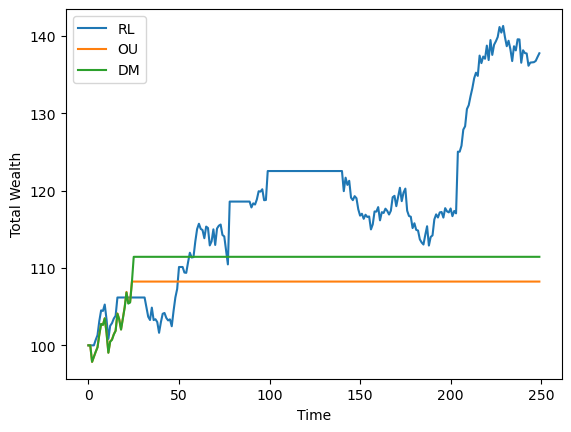

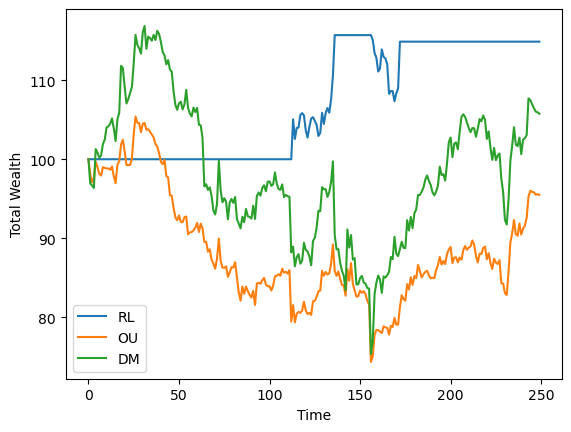

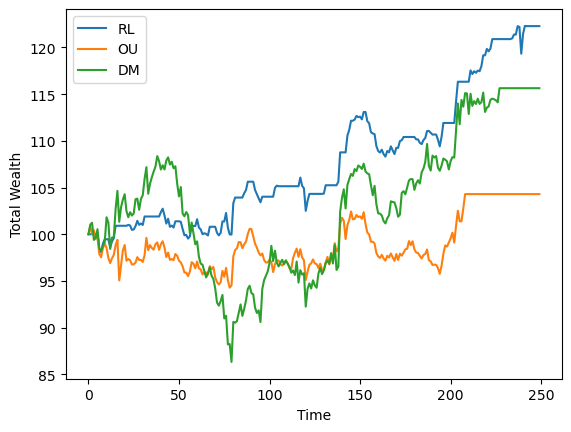

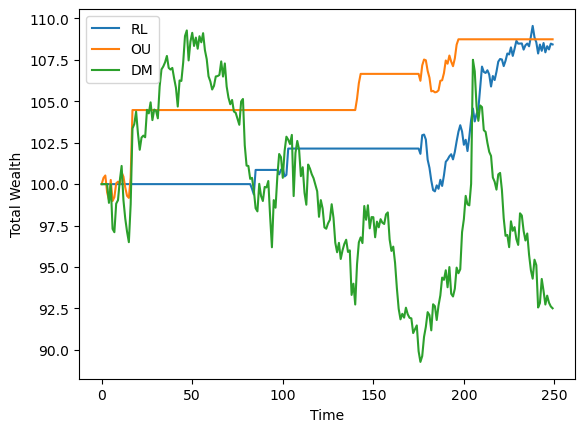

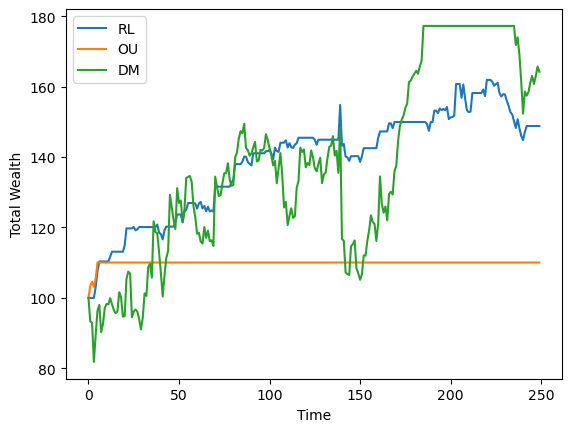

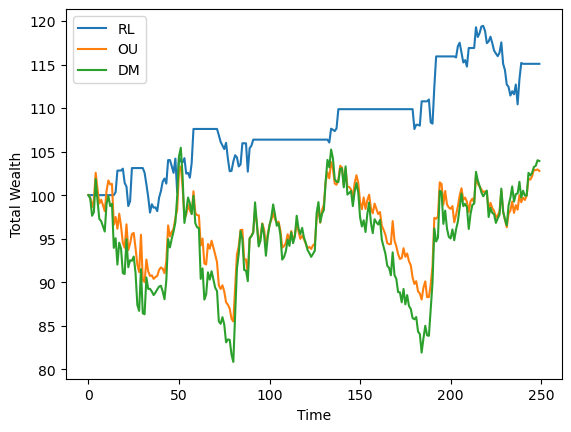

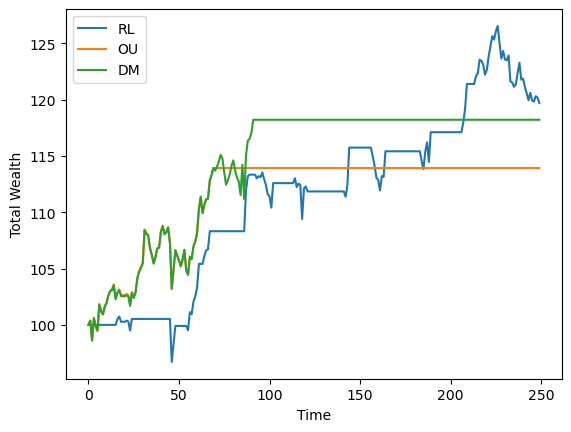

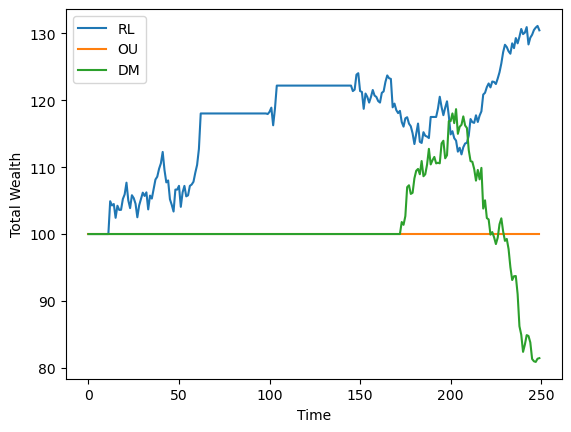

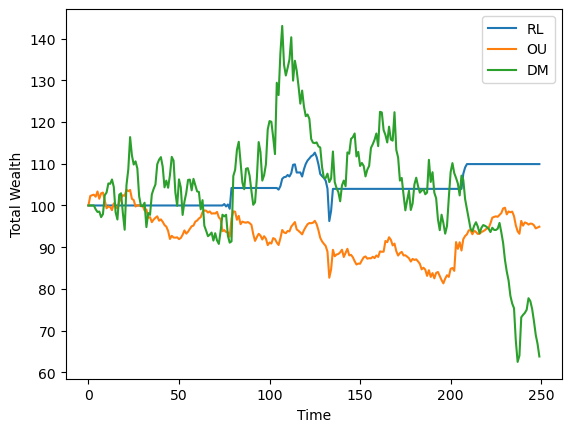

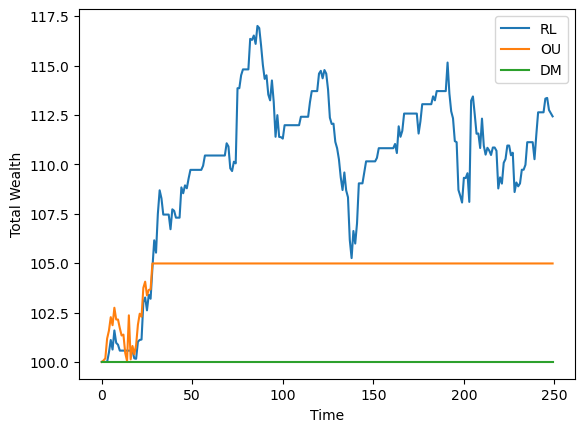

In [21]:

for key in rl_cum_wealth:
    plt.plot(rl_cum_wealth[key], label='RL')
    plt.plot(ou_cum_wealth[key], label='OU')
    plt.plot(dm_cum_wealth[key], label='DM')
    plt.xlabel('Time')
    plt.ylabel('Total Wealth')
    plt.legend()
    plt.savefig(key+'.png')
    plt.show()
    

In [22]:
from functions.trading_performance import summarize_total_equity

for key in rl_cum_wealth:
    print('dm:', summarize_total_equity(np.array(dm_cum_wealth[key])))
    print('ou:', summarize_total_equity(np.array(ou_cum_wealth[key])))
    print('rl:', summarize_total_equity(np.array(rl_cum_wealth[key])))

dm: {'DailyRet': 0.0446, 'DailyStd': 0.467, 'DailySharp': 0.0955, 'MaxDrawdown': -2.1344, 'CumulPnL': 11.4443}
ou: {'DailyRet': 0.0327, 'DailyStd': 0.4285, 'DailySharp': 0.0764, 'MaxDrawdown': -2.1427, 'CumulPnL': 8.2443}
rl: {'DailyRet': 0.1344, 'DailyStd': 1.0754, 'DailySharp': 0.125, 'MaxDrawdown': 0.0, 'CumulPnL': 37.7555}
dm: {'DailyRet': 0.044, 'DailyStd': 2.0692, 'DailySharp': 0.0213, 'MaxDrawdown': -24.6778, 'CumulPnL': 5.7581}
ou: {'DailyRet': -0.0073, 'DailyStd': 1.495, 'DailySharp': -0.0049, 'MaxDrawdown': -25.6665, 'CumulPnL': -4.5179}
rl: {'DailyRet': 0.0585, 'DailyStd': 0.7506, 'DailySharp': 0.078, 'MaxDrawdown': 0.0, 'CumulPnL': 14.8895}
dm: {'DailyRet': 0.0659, 'DailyStd': 1.2314, 'DailySharp': 0.0535, 'MaxDrawdown': -13.6791, 'CumulPnL': 15.6385}
ou: {'DailyRet': 0.0198, 'DailyStd': 0.7589, 'DailySharp': 0.0261, 'MaxDrawdown': -5.7253, 'CumulPnL': 4.298}
rl: {'DailyRet': 0.0826, 'DailyStd': 0.6, 'DailySharp': 0.1377, 'MaxDrawdown': -1.9476, 'CumulPnL': 22.2879}
dm: {'D

c:\Users\Boming\OneDrive - purdue.edu\Research\Code\Model-free-RL-Statistical-Arbitrage\functions\trading_performance.py:53: RuntimeWarning: invalid value encountered in double_scalars
  daily_sharpe = daily_return / daily_std
